# Chapter 8: Model Portfolio Construction

In [38]:
#HEADING 2: Creating a Portfolio of ETFs
#SKILL 2: Learn how to create your first Portfolio
class Portfolio:
  def __init__(self, name, riskBucket, expectedReturn=0, expectedRisk=0):
    self.name = name
    self.riskBucket = riskBucket
    self.allocations = []
    self.expectedReturn = expectedReturn
    self.expectedRisk = expectedRisk

class Allocation:
  def __init__(self, ticker, percentage):
    self.ticker = ticker
    self.percentage = percentage

In [ ]:
# SPDR S&P 500 Trust ETF (SPY)
# iShares 20+ Year Treasury Bond ETF (TLT)
stocks = Allocation("SPY", 0.6)
bonds = Allocation("TLT", 0.4)
myPortfolio = Portfolio("Growth", 4)
myPortfolio.allocations.append(stocks)
myPortfolio.allocations.append(bonds)

In [2]:
#HEADING 3: Portfolio Breakdown by Asset Class and Region and Sector
#SKILL 3: Learn how to analyze the makeup of your Portfolio
spy = yf.Ticker("SPY")
tlt = yf.Ticker("TLT")

spy.info
#print(bnd.info)

{'exchange': 'PCX',
 'shortName': 'SPDR S&P 500',
 'longName': 'SPDR S&P 500 ETF Trust',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-18000000',
 'quoteType': 'ETF',
 'symbol': 'SPY',
 'messageBoardId': 'finmb_6160262',
 'market': 'us_market',
 'annualHoldingsTurnover': None,
 'enterpriseToRevenue': None,
 'beta3Year': 1,
 'profitMargins': None,
 'enterpriseToEbitda': None,
 '52WeekChange': None,
 'morningStarRiskRating': None,
 'forwardEps': None,
 'revenueQuarterlyGrowth': None,
 'fundInceptionDate': 727660800,
 'annualReportExpenseRatio': None,
 'totalAssets': 386065727488,
 'bookValue': None,
 'fundFamily': 'SPDR State Street Global Advisors',
 'lastFiscalYearEnd': None,
 'netIncomeToCommon': None,
 'trailingEps': None,
 'lastDividendValue': None,
 'SandP52WeekChange': None,
 'priceToBook': None,
 'nextFiscalYearEnd': None,
 'yield': 0.0152,
 'mostRecentQuarter': None,
 'enterpriseValue': Non

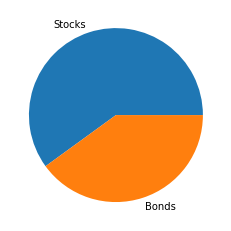

In [ ]:
# Asset Class
import matplotlib.pyplot as plt
import numpy as np

assetClassWeights = [myPortfolio.allocations[0].percentage, myPortfolio.allocations[1].percentage]
assetClassLabels = ["Stocks", "Bonds"]

plt.pie(assetClassWeights, labels = assetClassLabels)
plt.show()

In [ ]:
# Region

stockMarket = spy.info["market"]
bondMarket = tlt.info["market"]

import pandas as pd
df = pd.DataFrame([[stockMarket,myPortfolio.allocations[0].percentage],[bondMarket,myPortfolio.allocations[1].percentage]])
df = df.groupby(0).sum().reset_index()

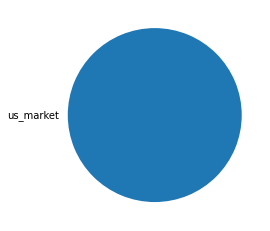

In [ ]:
assetClassWeights = [df.loc[0][1]]
assetClassLabels = [df.loc[0][0]]

plt.pie(assetClassWeights, labels = assetClassLabels)
plt.show()

In [ ]:
# Sector Weights
sectors1 = spy.info["sectorWeightings"]
sectors2 = tlt.info["sectorWeightings"]

df = pd.DataFrame(sectors1)
df2 = pd.DataFrame(sectors2)
df = df.append(df2)
df.index.name = "index"

df = df.groupby("index", dropna=True).sum().sum().reset_index()

In [ ]:
sectorWeights = df[df.columns[1]]
sectorLabels = df[df.columns[0]]

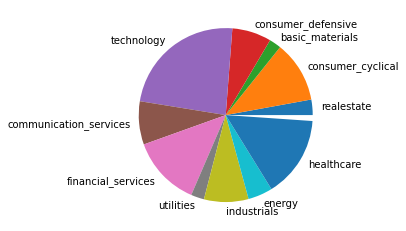

In [ ]:
plt.pie(sectorWeights, labels = sectorLabels)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


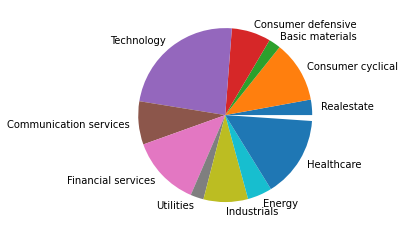

In [ ]:
for index, value in sectorLabels.iteritems():
  sectorLabels[index] = (value.capitalize().replace("_", " "))

plt.pie(sectorWeights, labels = sectorLabels)
plt.show()

In [ ]:
#HEADING 4: Creating Model Portfolios with Risk Bands
#SKILL 4: Learn how to create multiple Portfolios using Risk Bands

df = yf.download("SPY TLT", group_by="Ticker", period="20y")

[*********************100%***********************]  2 of 2 completed


In [ ]:
df

SPY                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2002-11-05   90.839996   92.070000   90.839996   91.849998   62.559032   
2002-11-06   92.480003   93.070000   90.790001   93.040001   63.369556   
2002-11-07   92.019997   92.220001   90.220001   90.760002   61.816647   
2002-11-08   90.529999   91.570000   89.519997   89.650002   61.060654   
2002-11-11   89.510002   89.559998   87.800003   88.260002   60.113873   
...                ...         ...         ...         ...         ...   
2022-10-31  386.440002  388.399994  385.260010  386.209991  386.209991   
2022-11-01  390.140015  390.390015  383.290009  384.519989  384.519989   
2022-11-02  383.899994  388.630005  374.760010  374.869995  374.869995   
2022-11-03  371.470001  374.200012  368.790009  371.010010  371.010010   
2022-11-04  377.000000  378.869995  370.000000  376.350006  376.350006   

                             TLT                                              \
               Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2002-11-05   37270800  85.599998  85.599998  85.089996  85.269997  43.889660   
2002-11-06   65013100  85.050003  86.129997  84.910004  85.610001  44.064659   
2002-11-07   51572000  87.050003  87.730003  86.849998  87.730003  45.155865   
2002-11-08   37905400  88.400002  88.650002  87.949997  88.440002  45.521332   
2002-11-11   33505100  88.550003  88.919998  88.400002  88.919998  45.768311   
...               ...        ...        ...        ...        ...        ...   
2022-10-31   96631300  96.360001  96.620003  95.029999  96.110001  95.874001   
2022-11-01   85407600  97.379997  97.419998  96.209999  96.769997  96.769997   
2022-11-02  126990400  96.910004  97.629997  95.959999  96.349998  96.349998   
2022-11-03   87100100  95.169998  96.379997  95.089996  95.830002  95.830002   
2022-11-04  103449600  95.099998  95.660004  94.220001  94.220001  94.220001   

                      
              Volume  
Date                  
2002-11-05     73800  
2002-11-06    118500  
2002-11-07    147900  
2002-11-08    294700  
2002-11-11     70000  
...              ...  
2022-10-31  23956700  
2022-11-01  17585100  
2022-11-02  25010500  
2022-11-03  29097500  
2022-11-04  23555400  

[5036 rows x 12 columns]

In [ ]:
df = df.iloc[:, df.columns.get_level_values(1)=="Close"]
df

,SPY,TLT
,Close,Close
Date,,
2002-11-05,91.849998,85.269997
2002-11-06,93.040001,85.610001
2002-11-07,90.760002,87.730003
2002-11-08,89.650002,88.440002
2002-11-11,88.260002,88.919998
...,...,...
2022-10-31,386.209991,96.110001
2022-11-01,384.519989,96.769997


In [ ]:
df = df.dropna()

In [ ]:
df.columns = df.columns.droplevel(1)
df

,SPY,TLT
Date,,
2002-11-05,91.849998,85.269997
2002-11-06,93.040001,85.610001
2002-11-07,90.760002,87.730003
2002-11-08,89.650002,88.440002
2002-11-11,88.260002,88.919998
...,...,...
2022-10-31,386.209991,96.110001
2022-11-01,384.519989,96.769997
2022-11-02,374.869995,96.349998


In [ ]:
class Portfolio:
  def __init__(self, name, riskBucket, expectedReturn=0, expectedRisk=0):
    self.name = name
    self.riskBucket = riskBucket
    self.allocations = []
    self.expectedReturn = expectedReturn
    self.expectedRisk = expectedRisk

  def getDailyPrices(self, period):
    tickerStringList = ""
    for allocation in self.allocations:
      tickerStringList = tickerStringList + str(allocation.ticker) + " "
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

In [ ]:
stocks = Allocation("SPY", 0.6)
bonds = Allocation("TLT", 0.4)
myPortfolio = Portfolio("Growth", 4)
myPortfolio.allocations.append(stocks)
myPortfolio.allocations.append(bonds)

df = myPortfolio.getDailyPrices("20y")
df

[*********************100%***********************]  2 of 2 completed


,SPY,TLT
Date,,
2002-11-05,91.849998,85.269997
2002-11-06,93.040001,85.610001
2002-11-07,90.760002,87.730003
2002-11-08,89.650002,88.440002
2002-11-11,88.260002,88.919998
...,...,...
2022-10-31,386.209991,96.110001
2022-11-01,384.519989,96.769997
2022-11-02,374.869995,96.349998


In [ ]:
# NOTE: Read Python For Finance for a bottoms up approach to MPT

import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 7.3%
Annual volatility: 19.1%
Sharpe Ratio: 0.28


(0.0731391808035784, 0.19144642510626766, 0.27756684813561816)

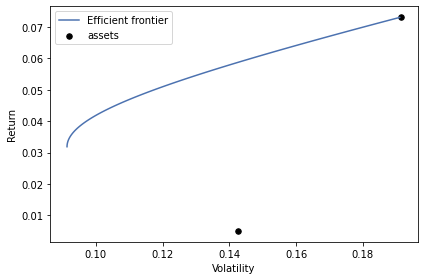

In [ ]:
# TODO: Visualize the EF
import matplotlib.pyplot as plt
from pypfopt import plotting
fig, ax = plt.subplots()
ef = EfficientFrontier(mu, S)
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [ ]:
ef.clean_weights()

OrderedDict([('SPY', 0.80715), ('TLT', 0.19285)])

In [ ]:
# Risk bands?
# Set constraints for 2, 4, 6, 8, 10% returns using efficient_return()
ef = EfficientFrontier(mu, S)
ef.efficient_return(0.02)
portfolio1 = ef.clean_weights()
print(portfolio1)
ef.efficient_return(0.04)
portfolio2 = ef.clean_weights()
print(portfolio2)
ef.efficient_return(0.06)
portfolio3 = ef.clean_weights()
print(portfolio3)
ef.efficient_return(0.08)
portfolio4 = ef.clean_weights()
print(portfolio4)
ef.efficient_return(0.10)
portfolio5 = ef.clean_weights()
print(portfolio5)

OrderedDict([('SPY', 0.39428), ('TLT', 0.60572)])
OrderedDict([('SPY', 0.5136), ('TLT', 0.4864)])
OrderedDict([('SPY', 0.80715), ('TLT', 0.19285)])


ValueError: ignored

In [ ]:
def getDailyPrices(tickerStringList, period):
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data
df = getDailyPrices("VTI TLT IEI GLD DBC", "20y")
df

[*********************100%***********************]  5 of 5 completed


,GLD,VTI,DBC,IEI,TLT
Date,,,,,
2007-01-11,60.630001,70.500000,22.650000,99.919998,88.449997
2007-01-12,62.169998,70.964996,23.180000,99.930000,88.040001
2007-01-16,61.970001,70.830002,22.650000,99.830002,88.230003
2007-01-17,62.639999,70.879997,22.850000,99.820000,87.959999
2007-01-18,62.259998,70.500000,22.610001,99.910004,88.230003
...,...,...,...,...,...
2022-10-31,151.910004,194.029999,25.120001,113.540001,96.110001
2022-11-01,153.460007,193.429993,25.500000,113.209999,96.769997
2022-11-02,152.389999,188.339996,25.730000,113.110001,96.349998


In [ ]:
# Add some tech stocks now we can go up to 12%!

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Risk bands?
# Set constraints for 2, 4, 6, 8, 10% returns using efficient_return()
ef = EfficientFrontier(mu, S)
ef.efficient_return(0.02)
portfolioWeights1 = ef.clean_weights()
print(portfolioWeights1)
ef.efficient_return(0.04)
portfolioWeights2 = ef.clean_weights()
print(portfolioWeights2)
ef.efficient_return(0.06)
portfolioWeights3 = ef.clean_weights()
print(portfolioWeights3)
ef.efficient_return(0.08)
portfolioWeights4 = ef.clean_weights()
print(portfolioWeights4)
ef.efficient_return(0.10)
portfolioWeights5 = ef.clean_weights()
print(portfolioWeights5)

OrderedDict([('GLD', 0.07678), ('VTI', 0.14344), ('DBC', 0.0), ('IEI', 0.77979), ('TLT', 0.0)])
OrderedDict([('GLD', 0.30556), ('VTI', 0.27805), ('DBC', 0.0), ('IEI', 0.41639), ('TLT', 0.0)])
OrderedDict([('GLD', 0.52773), ('VTI', 0.42226), ('DBC', 0.0), ('IEI', 0.0), ('TLT', 0.05001)])


ValueError: ignored

In [ ]:
class Portfolio:
  def __init__(self, name, riskBucket, expectedReturn=0, expectedRisk=0):
    self.name = name
    self.riskBucket = riskBucket
    self.allocations = []
    self.expectedReturn = expectedReturn
    self.expectedRisk = expectedRisk

  def getDailyPrices(self, period):
    tickerStringList = ""
    for allocation in self.allocations:
      tickerStringList = tickerStringList + str(allocation.ticker) + " "
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

  def printPortfolio(self):
    print("Portfolio Name: " + self.name)
    print("Risk Bucket: " + str(self.riskBucket))
    print("Expected Return: " + str(self.expectedReturn))
    print("Expected Risk: " + str(self.expectedRisk))
    print("Allocations: ")
    for allocation in self.allocations:
      print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

In [ ]:
newPortfolio = Portfolio("Aggressive Growth", 5)

for key, value in portfolioWeights5.items():
  newAllocation = Allocation(key, value)
  newPortfolio.allocations.append(newAllocation)

newPortfolio.printPortfolio()

Portfolio Name: Aggressive Growth
Rick Bucket: 5
Expected Return: 0.0
Expected Risk: 0.0
Allocations: 
Ticker: GOOG, Percentage: 0.10096
Ticker: MSFT, Percentage: 0.01317
Ticker: TLT, Percentage: 0.56575
Ticker: SPY, Percentage: 0.09261
Ticker: AAPL, Percentage: 0.22751


In [ ]:
def getPortfolio(riskBucket: int) -> Portfolio:

  df = getDailyPrices("SPY TLT AAPL GOOG MSFT", "20y")

  mu = expected_returns.mean_historical_return(df)
  S = risk_models.sample_cov(df)

  ef = EfficientFrontier(mu, S)
  expectedReturn = 0
  portfolioName = ""

  if(riskBucket == 1):
    expectedReturn = 0.02
    portfolioName = "Conservative"
  elif(riskBucket == 2):
    expectedReturn = 0.04
    portfolioName = "Moderate"
  elif(riskBucket == 3):
    expectedReturn = 0.06
    portfolioName = "Moderate Growth"
  elif(riskBucket == 4):
    expectedReturn = 0.08
    portfolioName = "Growth"
  elif(riskBucket == 5):
    expectedReturn = 0.12
    portfolioName = "Aggressive Growth"
  else:
    return -1

  ef.efficient_return(expectedReturn)
  expectedRisk = ef.portfolio_performance()[1]
  portfolioWeights = ef.clean_weights()

  newPortfolio = Portfolio(portfolioName, riskBucket)
  newPortfolio.expectedReturn = expectedReturn
  newPortfolio.expectedRisk = expectedRisk

  for key, value in portfolioWeights.items():
    newAllocation = Allocation(key, value)
    newPortfolio.allocations.append(newAllocation)

  return newPortfolio

In [ ]:
myPortfolio = getPortfolio(5)
myPortfolio.printPortfolio()

[*********************100%***********************]  5 of 5 completed
Portfolio Name: Aggressive Growth
Risk Bucket: 5
Expected Return: 0.12
Expected Risk: 0.1176720608973995
Allocations: 
Ticker: MSFT, Percentage: 0.01317
Ticker: TLT, Percentage: 0.56575
Ticker: GOOG, Percentage: 0.10096
Ticker: AAPL, Percentage: 0.22751
Ticker: SPY, Percentage: 0.09261


In [ ]:
class Portfolio:

  def __init__(self, tickerString: str, expectedReturn: float, portfolioName: str, riskBucket: int):

    self.name = portfolioName
    self.riskBucket = riskBucket
    self.expectedReturn = expectedReturn
    self.allocations = []

    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import risk_models
    from pypfopt import expected_returns

    df = self.__getDailyPrices(tickerString, "20y")

    self.mu = expected_returns.mean_historical_return(df)
    self.S = risk_models.sample_cov(df)

    ef = EfficientFrontier(self.mu, self.S)

    ef.efficient_return(expectedReturn)
    self.expectedRisk = ef.portfolio_performance()[1]
    portfolioWeights = ef.clean_weights()

    for key, value in portfolioWeights.items():
      newAllocation = Allocation(key, value)
      self.allocations.append(newAllocation)

  def __getDailyPrices(self, tickerStringList, period):
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

  def printPortfolio(self):
    print("Portfolio Name: " + self.name)
    print("Risk Bucket: " + str(self.riskBucket))
    print("Expected Return: " + str(self.expectedReturn))
    print("Expected Risk: " + str(self.expectedRisk))
    print("Allocations: ")
    for allocation in self.allocations:
      print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

  def showEfficientFrontier(self):
      import copy
      import numpy as np
      ef = EfficientFrontier(self.mu, self.S)
      fig, ax = plt.subplots()
      ef_max_sharpe = copy.deepcopy(ef)
      ef_return = copy.deepcopy(ef)
      plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

      # Generate random portfolios
      n_samples = 10000
      w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
      rets = w.dot(ef.expected_returns)
      stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
      sharpes = rets / stds
      ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

      # Find the tangency portfolio
      ef_max_sharpe.max_sharpe()
      ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
      ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

      # Find the return portfolio
      ef_return.efficient_return(self.expectedReturn)
      ret_tangent2, std_tangent2, _ = ef_return.portfolio_performance()
      returnP = str(int(self.expectedReturn*100))+"%"
      ax.scatter(std_tangent2, ret_tangent2, marker="*", s=100, c="y", label=returnP)

      # Output
      ax.set_title("Efficient Frontier for " + returnP + " returns")
      ax.legend()
      plt.tight_layout()
      plt.show()

In [ ]:
myPortfolio = Portfolio("SPY TLT AAPL AMZN NFLX GOOGL MSFT", expectedReturn = 0.10, portfolioName = "Aggressive Growth", riskBucket = 5)
myPortfolio.printPortfolio()

[*********************100%***********************]  7 of 7 completed
Portfolio Name: Aggressive Growth
Risk Bucket: 5
Expected Return: 0.1
Expected Risk: 0.11036746588621268
Allocations: 
Ticker: GOOGL, Percentage: 0.0625
Ticker: NFLX, Percentage: 0.03181
Ticker: SPY, Percentage: 0.15241
Ticker: TLT, Percentage: 0.56974
Ticker: MSFT, Percentage: 0.0
Ticker: AAPL, Percentage: 0.17176
Ticker: AMZN, Percentage: 0.01179


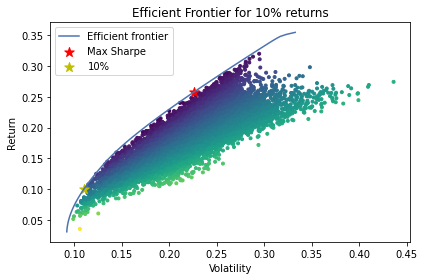

In [ ]:
myPortfolio.showEfficientFrontier()

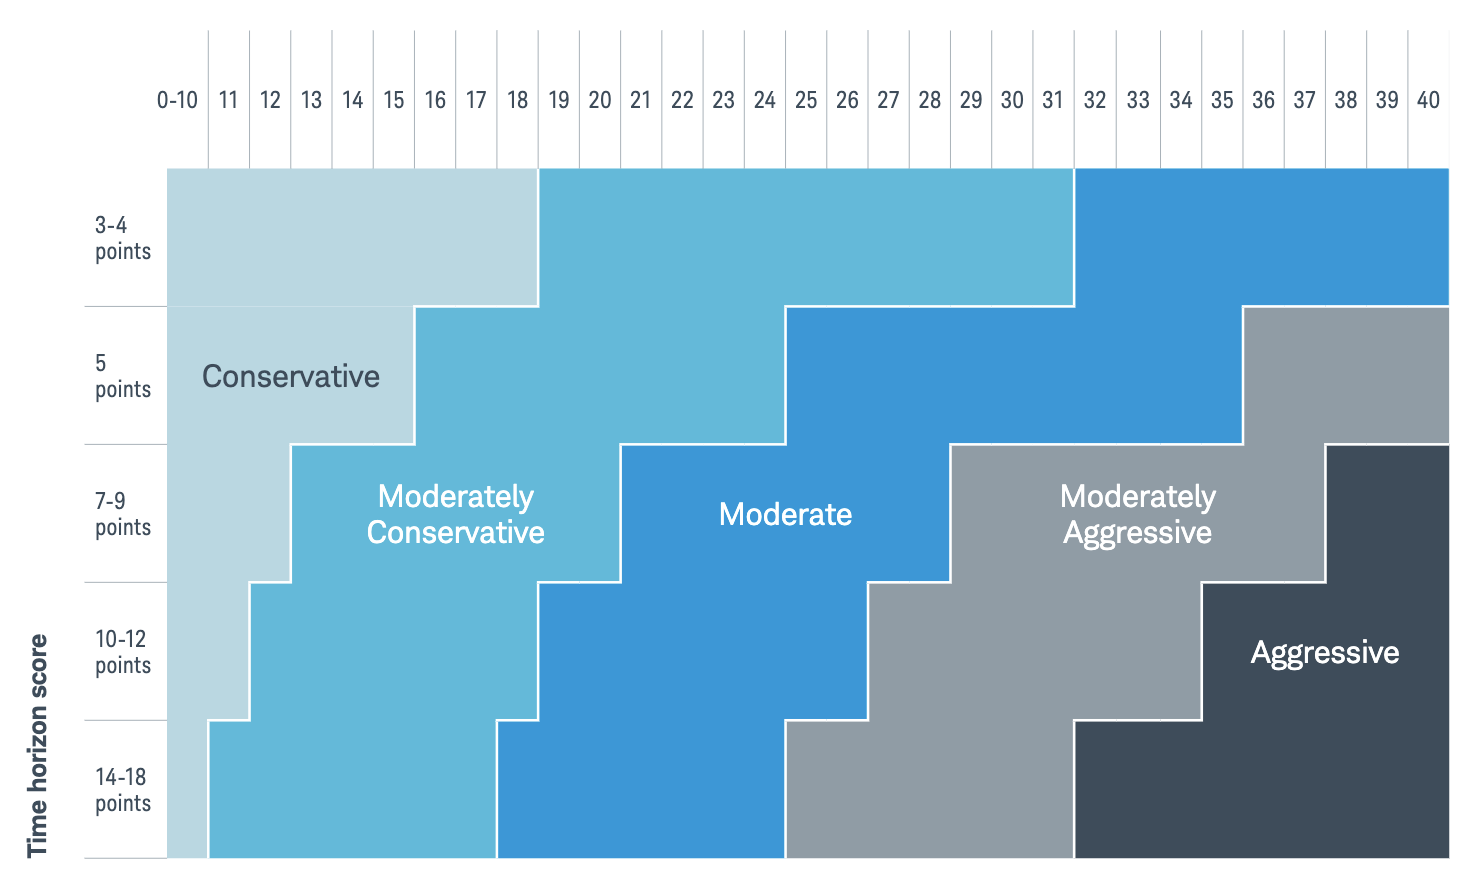

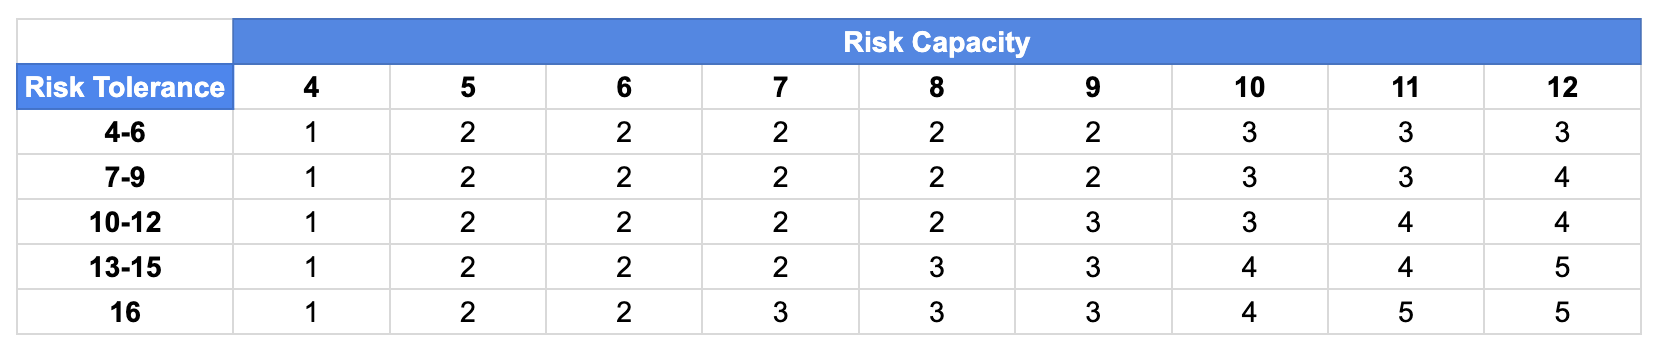

In [ ]:
#HEADING 5: Mapping Model Portfolios to Risk Scores
#SKILL 5: Learn how to map Model Portfolios to Risk Scores

import pandas as pd
allocationMappingTable = pd.DataFrame(
    [[1,2,2,2,2,2,3,3,3,3],
     [1,2,2,2,2,2,3,3,4,4],
     [1,2,2,2,2,3,3,4,4,4],
     [1,2,2,2,3,3,4,4,5,5],
     [1,2,2,3,3,3,4,4,5,5]]
)

allocationLookupTable = pd.DataFrame(
    columns = ["Portfolio","Capacity_min", "Capacity_max", "Tolerance_min", "Tolerance_max"],
    data = 
    [[1,0,10,4,6],
     [1,0,10,7,9],
     [1,0,10,10,12],
     [1,0,10,13,15],
     [1,0,10,16,16],
     [2,11,20,4,6],
     [2,11,20,7,9],
     [2,11,20,10,12],
     [2,11,20,13,15],
     [2,11,20,16,16],
     [2,21,30,4,6],
     [2,21,30,7,9],
     [2,21,30,10,12],
     [2,21,30,13,15],
     [2,21,30,16,16],
     [2,31,40,4,6],
     [2,31,40,7,9],
     [2,31,40,10,12],
     [2,31,40,13,15],
     [3,31,40,16,16],
     [2,41,50,4,6],
     [2,41,50,7,9],
     [2,41,50,10,12],
     [3,41,50,13,15],
     [3,41,50,16,16],
     [2,51,60,4,6],
     [2,51,60,7,9],
     [3,51,60,10,12],
     [3,51,60,13,15],
     [3,51,60,16,16],
     [3,61,70,4,6],
     [3,61,70,7,9],
     [3,61,70,10,12],
     [4,61,70,13,15],
     [4,61,70,16,16],
     [3,71,80,4,6],
     [3,71,80,7,9],
     [4,71,80,10,12],
     [4,71,80,13,15],
     [4,71,80,16,16],
     [3,81,90,4,6],
     [4,81,90,7,9],
     [4,81,90,10,12],
     [5,81,90,13,15],
     [5,81,90,16,16],
     [3,91,100,4,6],
     [4,91,100,7,9],
     [4,91,100,10,12],
     [5,91,100,13,15],
     [5,91,100,16,16],]
)

allocationLookupTable

,Portfolio,Capacity_min,Capacity_max,Tolerance_min,Tolerance_max
0,1,0,10,4,6
1,1,0,10,7,9
2,1,0,10,10,12
3,1,0,10,13,15
4,1,0,10,16,16
5,2,11,20,4,6
6,2,11,20,7,9
7,2,11,20,10,12
8,2,11,20,13,15
9,2,11,20,16,16


In [ ]:
# Read from CSV
allocationLookupTable=pd.read_csv('/content/drive/MyDrive/Books/Robo-advisor with Python /Data/Allocation Lookup.csv')
allocationLookupTable

,Portfolio,Capacity_min,Capacity_max,Tolerance_min,Tolerance_max
0,1,0,10,4,6
1,1,0,10,7,9
2,1,0,10,10,12
3,1,0,10,13,15
4,1,0,10,16,16
5,2,11,20,4,6
6,2,11,20,7,9
7,2,11,20,10,12
8,2,11,20,13,15
9,2,11,20,16,16


In [39]:
class Portfolio:

  def __init__(self, tickerString: str, expectedReturn: float, portfolioName: str, riskBucket: int):

    self.name = portfolioName
    self.riskBucket = riskBucket
    self.expectedReturn = expectedReturn
    self.allocations = []

    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import risk_models
    from pypfopt import expected_returns

    df = self.__getDailyPrices(tickerString, "20y")

    mu = expected_returns.mean_historical_return(df)
    S = risk_models.sample_cov(df)

    ef = EfficientFrontier(mu, S)

    ef.efficient_return(expectedReturn)
    self.expectedRisk = ef.portfolio_performance()[1]
    portfolioWeights = ef.clean_weights()

    for key, value in portfolioWeights.items():
      newAllocation = Allocation(key, value)
      self.allocations.append(newAllocation)

  def __getDailyPrices(self, tickerStringList, period):
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

  def printPortfolio(self):
    print("Portfolio Name: " + self.name)
    print("Risk Bucket: " + str(self.riskBucket))
    print("Expected Return: " + str(self.expectedReturn))
    print("Expected Risk: " + str(self.expectedRisk))
    print("Allocations: ")
    for allocation in self.allocations:
      print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

  @staticmethod
  def getPortfolioMapping(riskToleranceScore, riskCapacityScore):
    import pandas as pd
    allocationLookupTable=pd.read_csv('/content/drive/MyDrive/Books/Robo-advisor with Python/Data/Risk Mapping Lookup.csv')
    matchTol = (allocationLookupTable['Tolerance_min'] <= riskTolScore) & (allocationLookupTable['Tolerance_max'] >= riskTolScore)
    matchCap = (allocationLookupTable['Capacity_min'] <= riskCapScore) & (allocationLookupTable['Capacity_max'] >= riskCapScore)
    portfolioID = allocationLookupTable['Portfolio'][(matchTol & matchCap)]
    return portfolioID.values[0]

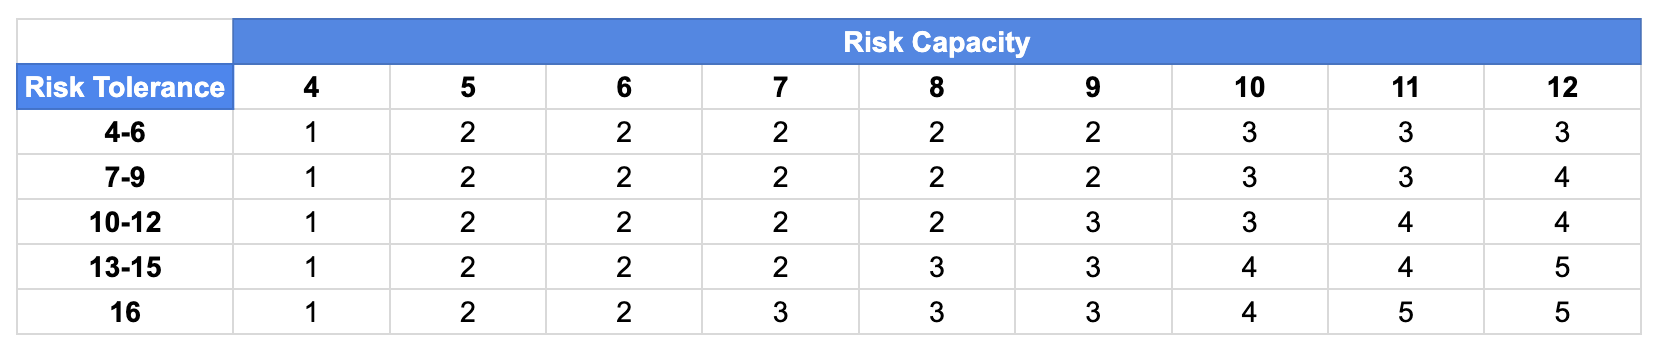

In [ ]:
# Tol 10, Cap 9
#riskTolScore = 10
#riskCapScore = 9
riskTolScore = toleranceQuestionnaire.score
riskCapScore = capacityQuestionnaire.score

myPortfolioID = Portfolio.getPortfolioMapping(riskTolScore, riskCapScore)
print(myPortfolioID)

3


In [ ]:
# TODO: Read portfolios from csv with name, returns, tickerlist (same) per row
myPortfolio = Portfolio("SPY TLT AAPL GOOG MSFT", expectedReturn = 0.12, portfolioName = "Aggressive Growth", riskBucket = 5)
myPortfolio.printPortfolio()

[*********************100%***********************]  5 of 5 completed
Portfolio Name: Aggressive Growth
Risk Bucket: 5
Expected Return: 0.12
Expected Risk: 0.12032793249321631
Allocations: 
Ticker: GOOG, Percentage: 0.09933
Ticker: AAPL, Percentage: 0.235
Ticker: TLT, Percentage: 0.55941
Ticker: MSFT, Percentage: 0.00761
Ticker: SPY, Percentage: 0.09865
